# Importing Libraries

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Creating path for df
path = r"C:\Users\Artemis07\Downloads\29-08-2023 Instacart Basket Analysis"

In [3]:
#importing df
instacart_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customer_merge.pkl'))

## Creating Customer profile
Marital Status and number of Dependents

In [4]:
instacart_merged.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_price', 'spending_flag', 'median_orders',
       'order_frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'num_of_dependants', 'marital_status', 'income', 'region',
       'activity_flag'],
      dtype='object')

In [5]:
instacart_merged['marital_status'].value_counts(dropna = False)

marital_status
married                             22756753
single                               5325691
divorced/widowed                     2771812
living with parents and siblings     1550603
Name: count, dtype: int64

In [6]:
instacart_merged['num_of_dependants'].value_counts(dropna = False)

num_of_dependants
3    8135109
0    8097503
2    8091143
1    8081104
Name: count, dtype: int64

In [7]:
#Creating an marital status and number of dependents crosstab as family_profile
family_profile = pd.crosstab(instacart_merged['marital_status'], instacart_merged['num_of_dependants'], dropna = False)

In [8]:
family_profile

num_of_dependants,0,1,2,3
marital_status,,,,
divorced/widowed,2771812,0,0,0
living with parents and siblings,0,530200,507963,512440
married,0,7550904,7583180,7622669
single,5325691,0,0,0


__Creating fam_profile__

_Single Adult: single &/or divorced/widowed without dependents_

_Married with children: married with 1+ dependent_

_Young Adult: living with parents and siblings with 1+ dependent_

In [9]:
#Creating fam_profile flag for Single Adults
instacart_merged.loc[(instacart_merged['marital_status'].isin(['single', 'divorced/widowed']), 'fam_profile')] = 'Single Adult'

In [10]:
#Creating fam_profile flag for Married with children
instacart_merged.loc[(instacart_merged['marital_status'].isin(['married']), 'fam_profile')] = 'Married with children'

In [11]:
#Creating fam_profile flag for Single Adult 
instacart_merged.loc[(instacart_merged['marital_status'].isin(['living with parents and siblings']), 'fam_profile')] = 'Young Adult'

In [12]:
#Creating fam_profile flag for Single Adult 
instacart_merged.loc[(instacart_merged['marital_status'].isin(['living with parents and siblings']), 'fam_profile')] = 'Young Adult'

In [13]:
#Checking frequency of fam_profile flag
instacart_merged['fam_profile'].value_counts(dropna = False)

fam_profile
Married with children    22756753
Single Adult              8097503
Young Adult               1550603
Name: count, dtype: int64

In [14]:
#Creating a bar chart with fam_profile flag
instacart_merged['fam_profile'].value_counts().plot.bar

<bound method PlotAccessor.bar of <pandas.plotting._core.PlotAccessor object at 0x0000018DD31333D0>>

Text(0, 0.5, 'Frequency')

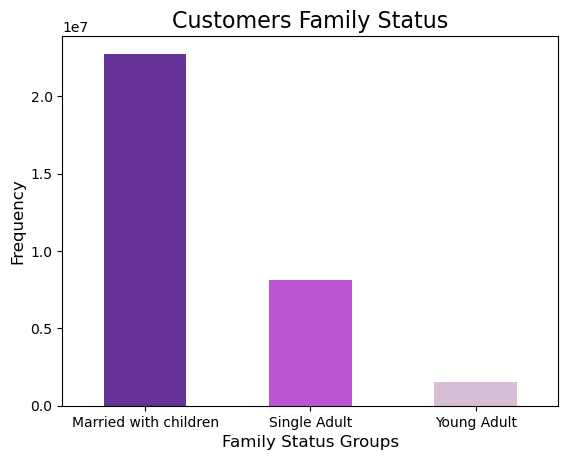

In [15]:
#Creating chart
bar_fam_profile = instacart_merged['fam_profile'].value_counts().sort_index().plot(kind = 'bar', stacked = False, rot = 0, color = ['rebeccapurple', 'mediumorchid', 'thistle'])
plt.title("Customers Family Status", fontsize = 16)
plt.xlabel("Family Status Groups", fontsize = 12)
plt.ylabel("Frequency", fontsize = 12)

In [16]:
# Exporting Customer Family Status bar chart into visualizations folder
bar_fam_profile.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_family_status.png'))

## Customer profile- Department goods

In [17]:
#Importing departments wrangled from Prepared Data 
df_dept = pd.read_csv(os. path. join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv' ))

In [18]:
df_dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [19]:
#Changing Unnamed: 0 to department_id to prepare for merging
df_dept.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [20]:
df_dept.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [21]:
#Merging departments with instacart_merged
instacart_merge = instacart_merged.merge(df_dept, on = 'department_id')

In [22]:
#checking output of merge
instacart_merge.head(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,state,age,date_joined,num_of_dependants,marital_status,income,region,activity_flag,fam_profile,department
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Alabama,31,2/17/2019,3,married,40423,South,normal activity,Married with children,beverages
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Alabama,31,2/17/2019,3,married,40423,South,normal activity,Married with children,beverages
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Alabama,31,2/17/2019,3,married,40423,South,normal activity,Married with children,beverages
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Alabama,31,2/17/2019,3,married,40423,South,normal activity,Married with children,beverages
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Alabama,31,2/17/2019,3,married,40423,South,normal activity,Married with children,beverages


In [23]:
#Exporting instacart_merge
instacart_merge.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customer_merge_department.pkl' ))

In [24]:
instacart_merge.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_price', 'spending_flag', 'median_orders',
       'order_frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'num_of_dependants', 'marital_status', 'income', 'region',
       'activity_flag', 'fam_profile', 'department'],
      dtype='object')

## Creating income levels 

In [25]:
#checking income stats
instacart_merge['income'].describe()

count    3.240486e+07
mean     9.943773e+04
std      4.305727e+04
min      2.590300e+04
25%      6.700400e+04
50%      9.661800e+04
75%      1.279120e+05
max      5.939010e+05
Name: income, dtype: float64

__income level__

_Lower Level: 25,000-67000_

_Middle Level: 67,000-129,000_

_Upper level: 129,000+_

In [26]:
#creating flag for low level
instacart_merge.loc[(instacart_merge['income'] >= 25000) & (instacart_merge['income'] <=67000), 'income_level'] = 'Low income'

In [27]:
#creating flag for middle level
instacart_merge.loc[(instacart_merge['income'] >= 67001) & (instacart_merge['income'] <= 129000), 'income_level']= 'Middle income'

In [28]:
#creating flag for upper level
instacart_merge.loc[(instacart_merge['income'] >= 129001), 'income_level'] = 'High income'

In [29]:
#checking output for 'income_level'
instacart_merge['income_level'].value_counts(dropna = False)

income_level
Middle income    16400341
Low income        8100799
High income       7903719
Name: count, dtype: int64

In [30]:
instacart_merge.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_price', 'spending_flag', 'median_orders',
       'order_frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'num_of_dependants', 'marital_status', 'income', 'region',
       'activity_flag', 'fam_profile', 'department', 'income_level'],
      dtype='object')

# Creating age group

In [31]:
#checking stats for age
instacart_merge['age'].describe()

count    3.240486e+07
mean     4.946527e+01
std      1.848558e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

__Age Groups__

_Young adult: 18-33_

_Adult: 34-49_

_Older Adult: 50-64_

_Senior: 65+_

In [32]:
#Creating age group flag for young adult
instacart_merge.loc[(instacart_merge['age'] >= 18) & (instacart_merge['age'] <= 33), 'age_group'] = 'Young Adult (18-33)'

In [33]:
#Creating age group flag for Adult 
instacart_merge.loc[(instacart_merge['age'] >= 34) & (instacart_merge['age'] <= 49), 'age_group'] = 'Adult (34-49)'

In [34]:
#Creating age group flag for Older Adult
instacart_merge.loc[(instacart_merge['age'] >= 50) & (instacart_merge['age'] <= 64), 'age_group'] = 'Older Adult (50-64)'

In [35]:
#Creating age group flag for Senior 
instacart_merge.loc[(instacart_merge['age'] >= 65), 'age_group'] = 'Senior (65+)'

In [36]:
#Checking output for 'age_group'
instacart_merge['age_group'].value_counts(dropna = False)

age_group
Senior (65+)           8575084
Adult (34-49)          8153117
Young Adult (18-33)    8120312
Older Adult (50-64)    7556346
Name: count, dtype: int64

## Creating age_income crosstab

In [37]:
#age_income crosstab
income_age = pd.crosstab(instacart_merge['income_level'], instacart_merge['age_group'], dropna = False)

In [38]:
income_age

age_group,Adult (34-49),Older Adult (50-64),Senior (65+),Young Adult (18-33)
income_level,,,,
High income,1776005,2835422,3204348,87944
Low income,2225525,1017912,1119276,3738086
Middle income,4151587,3703012,4251460,4294282


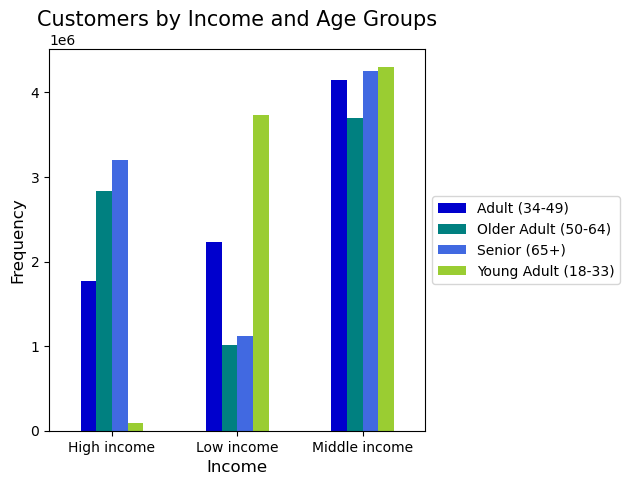

In [39]:
# Creating bar chart of income_age crosstab

bar_income_age = income_age.plot.bar(stacked = False, rot = 0, color = ['mediumblue', 'teal', 'royalblue', 'yellowgreen'])
plt.title("Customers by Income and Age Groups", fontsize = 15)
plt.xlabel("Income", fontsize = 12)
plt.ylabel("Frequency", fontsize = 12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()

In [40]:
# Exporting Customer by Income and Age group bar chart into visualizations folder
bar_income_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_age.png'))

# Addtional Visulizations

Text(0, 0.5, 'Count')

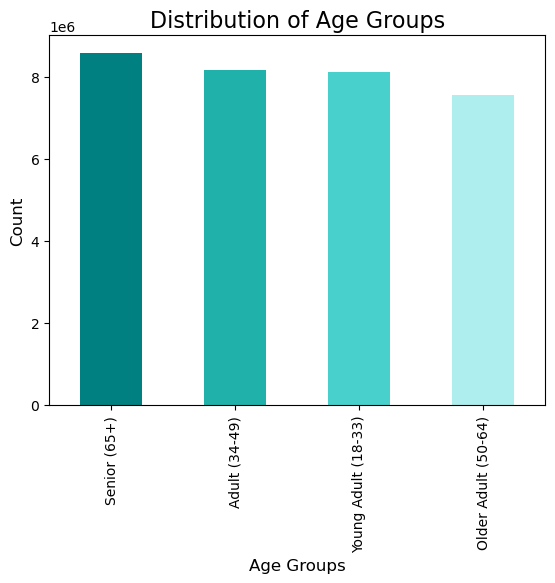

In [41]:
#Creating a bar chart on the customers age groups
bar_age_group = instacart_merge['age_group'].value_counts().plot.bar(color = ['teal', 'lightseagreen', 'mediumturquoise', 'paleturquoise'])
plt.title("Distribution of Age Groups", fontsize = 16)
plt.xlabel("Age Groups", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

In [42]:
#Exporting Distributon of Age Groups Bar chart
bar_age_group.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_groups.png'))

In [43]:
#Creating crosstab between age groups and spending flag
age_spending = pd.crosstab(instacart_merge['age_group'], instacart_merge['spending_flag'], dropna = False)

In [44]:
age_spending

spending_flag,High spender,Low spender
age_group,,
Adult (34-49),32133,8120984
Older Adult (50-64),27713,7528633
Senior (65+),32071,8543013
Young Adult (18-33),27777,8092535


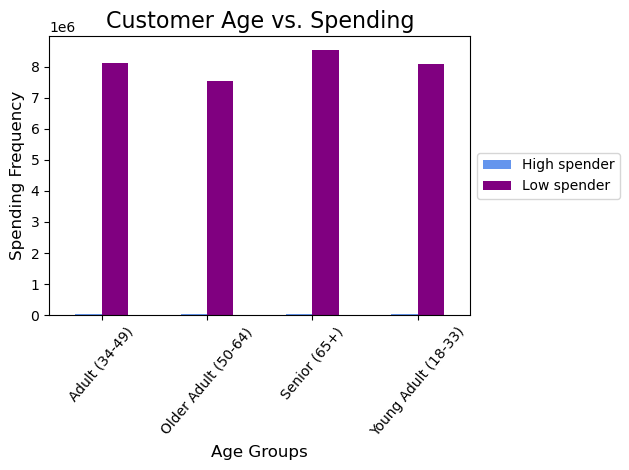

In [45]:
#Creating bar chart of age_spending
bar_age_spending  = age_spending.plot(kind = 'bar', stacked = False, rot = 50, color = ['cornflowerblue', 'purple'])
plt.title("Customer Age vs. Spending", fontsize = 16)
plt.xlabel("Age Groups", fontsize = 12)
plt.ylabel("Spending Frequency", fontsize = 12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()

In [46]:
#creating a crosstab between age and family profile
age_fam_profile = pd.crosstab(instacart_merge['age_group'], instacart_merge['fam_profile'], dropna = False)

In [47]:
age_fam_profile

fam_profile,Married with children,Single Adult,Young Adult
age_group,,,
Adult (34-49),6130902,2022215,0
Older Adult (50-64),5628455,1927891,0
Senior (65+),6455000,2120084,0
Young Adult (18-33),4542396,2027313,1550603


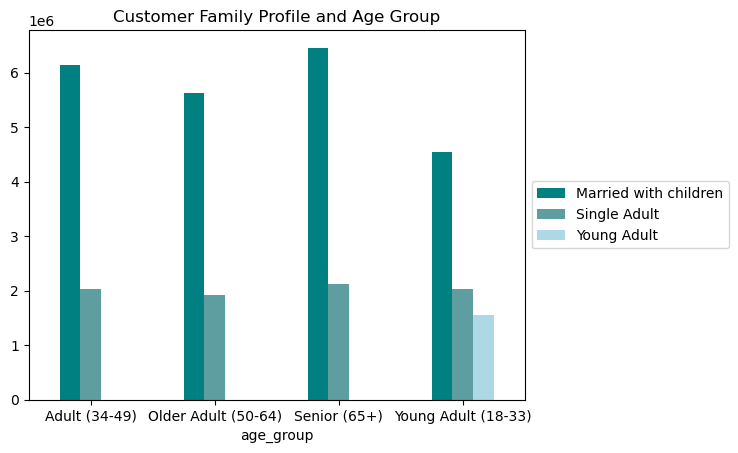

In [48]:
bar_age_fam_profile = age_fam_profile.plot(kind = 'bar', rot = 0, stacked = False, color = ['teal', 'cadetblue', 'lightblue'])
plt.title("Customer Family Profile and Age Group")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [49]:
#exporting Customer Family Profile and Age Group
bar_age_fam_profile.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_fam_profile.png'))

Text(0, 0.5, 'Frequency')

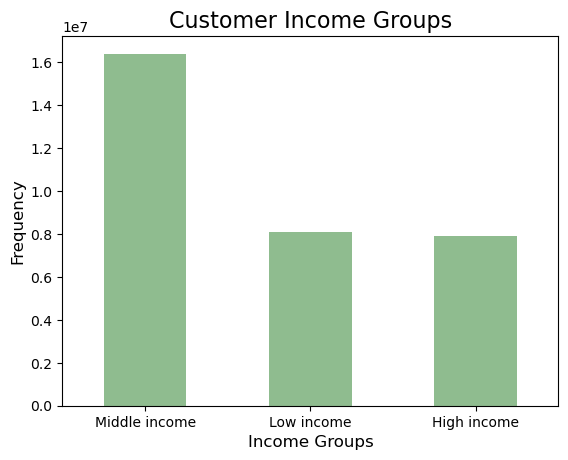

In [50]:
#Creating Customer income groups bar chart
bar_income_level = instacart_merge['income_level'].value_counts().plot.bar(rot = 0, color=['darkseagreen'])
plt.title("Customer Income Groups", fontsize = 16)
plt.xlabel('Income Groups', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)

In [51]:
#exporting  bar chart to visualization
bar_income_level.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_groups.png'))

In [52]:
#Creating a crosstab between income level and family profile
income_fam_profile = pd.crosstab(instacart_merge['income'], instacart_merge['fam_profile'], dropna = False)

In [53]:
income_fam_profile

fam_profile,Married with children,Single Adult,Young Adult
income,,,
25903,0,20,0
25911,28,0,0
25937,0,0,39
25941,31,0,0
25955,392,0,0
...,...,...,...
584097,0,826,0
590790,54,0,0
591089,176,0,0


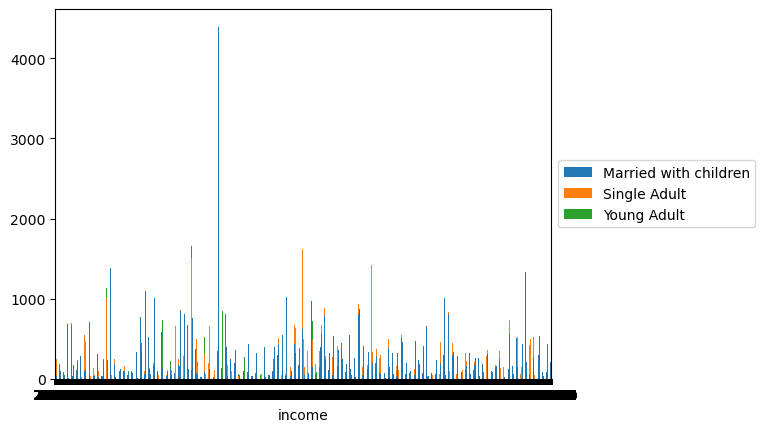

In [54]:
#Creating bar of income vs family profile
bar_income_fam_profile = income_fam_profile.plot(kind = 'bar', rot = 0, stacked = True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [55]:
bar_income_fam_profile

<Axes: xlabel='income'>

In [56]:
#Exporting instacart_merge
instacart_merge.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customer_merge_department.pkl' ))

In [57]:
instacart_merge.shape

(32404859, 38)

In [58]:
instacart_merge.head(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,date_joined,num_of_dependants,marital_status,income,region,activity_flag,fam_profile,department,income_level,age_group
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,2/17/2019,3,married,40423,South,normal activity,Married with children,beverages,Low income,Young Adult (18-33)
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,2/17/2019,3,married,40423,South,normal activity,Married with children,beverages,Low income,Young Adult (18-33)
2,473747,1,prior,3,3,12,21.0,196,1,1,...,2/17/2019,3,married,40423,South,normal activity,Married with children,beverages,Low income,Young Adult (18-33)
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,2/17/2019,3,married,40423,South,normal activity,Married with children,beverages,Low income,Young Adult (18-33)
4,431534,1,prior,5,4,15,28.0,196,1,1,...,2/17/2019,3,married,40423,South,normal activity,Married with children,beverages,Low income,Young Adult (18-33)
